<a href="https://colab.research.google.com/github/anslemhuncho/MACHINE-LEARNING-PROJECT/blob/main/CNN2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

mount drive in colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



compile the model

In [6]:
!pip install scikeras





     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 25.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


Found 3747 images belonging to 10 classes.
Found 411 images belonging to 10 classes.
Found 2069 images belonging to 10 classes.
Epoch 1/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 89s 683ms/step - accuracy: 0.1634 - loss: 2.3840 - val_accuracy: 0.2526 - val_loss: 2.1317 - learning_rate: 1.0000e-04
Epoch 2/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 587ms/step - accuracy: 0.2499 - loss: 2.0985

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


118/118 ━━━━━━━━━━━━━━━━━━━━ 76s 610ms/step - accuracy: 0.2500 - loss: 2.0983 - val_accuracy: 0.8519 - val_loss: 0.8832 - learning_rate: 1.0000e-04
Epoch 3/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 85s 631ms/step - accuracy: 0.2943 - loss: 2.0127 - val_accuracy: 0.3333 - val_loss: 1.9795 - learning_rate: 1.0000e-04
Epoch 4/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 74s 569ms/step - accuracy: 0.3208 - loss: 1.9339 - val_accuracy: 0.6667 - val_loss: 1.0788 - learning_rate: 1.0000e-04
Epoch 5/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 566ms/step - accuracy: 0.3467 - loss: 1.8611
Epoch 5: ReduceLROnPlateau reducing learning rate to 1.9999999494757503e-05.
118/118 ━━━━━━━━━━━━━━━━━━━━ 79s 642ms/step - accuracy: 0.3467 - loss: 1.8613 - val_accuracy: 0.3151 - val_loss: 1.9230 - learning_rate: 1.0000e-04
Epoch 6/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 134s 1s/step - accuracy: 0.3682 - loss: 1.7935 - val_accuracy: 0.7778 - val_loss: 0.8518 - learning_rate: 2.0000e-05
Epoch 7/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 92s 650ms/step - accurac

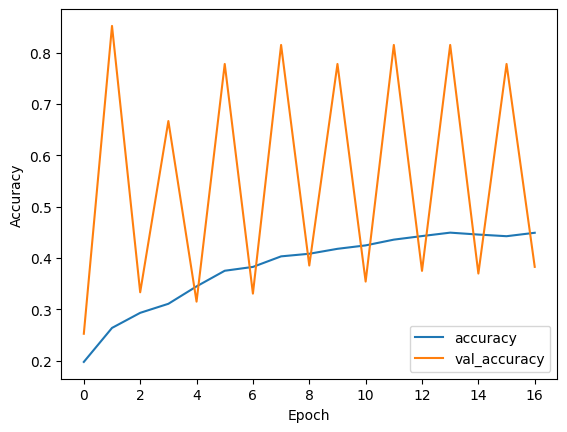

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

# Define paths to your train and test folders
train_path = '/content/drive/MyDrive/Normalised data/train'
test_path = '/content/drive/MyDrive/Normalised data/test'

# Set up data generators with data augmentation and preprocessing
datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.1
)

# Adjust batch size based on your system's memory
batch_size = 32
class_labels = ['animals_protection', 'appealing_for_peace', 'brexit', 'covid19', 'election', 'environment_protection', 'gender_equality', 'immigration', 'racial_equality', 'yellow_vests_movement']

train_generator = datagen.flow_from_directory(
    train_path,
    target_size=(254, 254),
    batch_size=batch_size,
    class_mode='categorical',
    classes=class_labels,
    shuffle=True,
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    train_path,
    target_size=(254, 254),
    batch_size=batch_size,
    class_mode='categorical',
    classes=class_labels,
    shuffle=False,
    subset='validation'
)

test_generator = datagen.flow_from_directory(
    test_path,
    target_size=(254, 254),
    batch_size=batch_size,
    class_mode='categorical',
    classes=class_labels,
    shuffle=False
)

# Define the CNN model architecture with an Input layer
model = Sequential([
    Input(shape=(254, 254, 3)),  # Specify input shape here
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(len(class_labels), activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Implement callbacks for early stopping and learning rate reduction
callbacks = [
    EarlyStopping(patience=5, verbose=1, restore_best_weights=True),
    ReduceLROnPlateau(factor=0.2, patience=3, min_lr=1e-6, verbose=1)
]

# Train the model
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    callbacks=callbacks
)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {test_accuracy}')

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()


In [12]:
# Print model summary
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)                    │ (None, 252, 252, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 126, 126, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 124, 124, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 62, 62, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 60, 60, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 30, 30, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 230400)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 512)                 │     117,965,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 355,023,776 (1.32 GB)

 Trainable params: 118,341,258 (451.44 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 236,682,518 (902.87 MB)

print predictions

In [13]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {test_accuracy}')

# Make predictions on a batch of test images
test_images, test_labels = next(test_generator)  # Get a batch of test images and labels
predictions = model.predict(test_images)

# Print predictions for each image in the batch
for i in range(len(test_images)):
    prediction = predictions[i]
    predicted_class_index = prediction.argmax()
    predicted_class = class_labels[predicted_class_index]
    print(f"Image {i+1}: Predicted Class: {predicted_class}, Predicted Probability: {prediction[predicted_class_index]:.4f}")



65/65 ━━━━━━━━━━━━━━━━━━━━ 37s 562ms/step - accuracy: 0.5112 - loss: 1.5153
Test Accuracy: 0.4610923230648041
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step
Image 1: Predicted Class: animals_protection, Predicted Probability: 0.3260
Image 2: Predicted Class: appealing_for_peace, Predicted Probability: 0.2384
Image 3: Predicted Class: election, Predicted Probability: 0.2683
Image 4: Predicted Class: appealing_for_peace, Predicted Probability: 0.2185
Image 5: Predicted Class: animals_protection, Predicted Probability: 0.4374
Image 6: Predicted Class: animals_protection, Predicted Probability: 0.4134
Image 7: Predicted Class: gender_equality, Predicted Probability: 0.3192
Image 8: Predicted Class: immigration, Predicted Probability: 0.2803
Image 9: Predicted Class: animals_protection, Predicted Probability: 0.1929
Image 10: Predicted Class: brexit, Predicted Probability: 0.3582
Image 11: Predicted Class: animals_protection, Predicted Probability: 0.3336
Image 12: Predicted Class: appealing_for_pe

In [20]:
model.save('/content/drive/MyDrive/Model/trained_model.h5')

65/65 ━━━━━━━━━━━━━━━━━━━━ 46s 709ms/step - accuracy: 0.5171 - loss: 1.5168
Test Accuracy: 0.4601256549358368
65/65 ━━━━━━━━━━━━━━━━━━━━ 35s 530ms/step


<Figure size 1000x800 with 0 Axes>

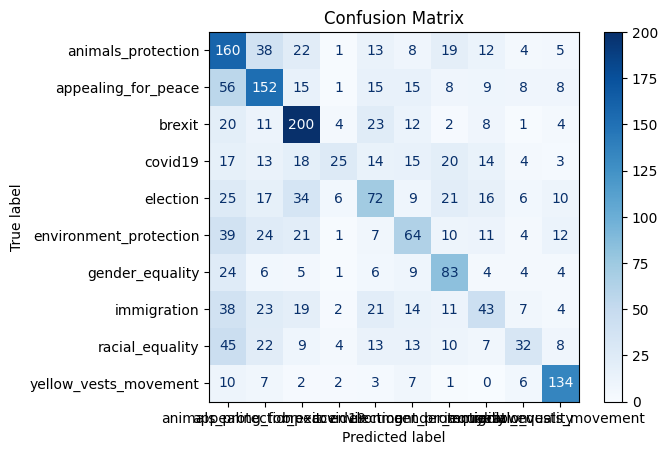

In [15]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {test_accuracy}')

# Make predictions on the test data
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes

# Compute the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes, labels=np.arange(len(class_labels)))

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


In [ ]:
pip install shap


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 4.4 MB/s eta 0:00:00
